In [1]:
import numpy as np
import sys,os
import multiprocessing as mp
import numpy as np
import pandas as pd
import libpysal as ps
sys.path.append('/Users/lziqi/Desktop/mgwr-optim/')
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage
%load_ext memory_profiler

C:\Users\lziqi\AppData\Local\Continuum\anaconda3\lib\site-packages\libpysal\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\lziqi\AppData\Local\Continuum\anaconda3\lib\site-packages\libpysal\io\iohandlers\__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


In [2]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [3]:
pool=mp.Pool(8)

In [4]:
size=20000;k=10
filename = "test0131_sub_"+str(size)+"_"+str(k) + ".csv"
test = pd.read_csv(filename)
coords = np.array(list(zip(test.x_coord.values,test.y_coord.values)))
X = test.iloc[:,4:].values
y = test.Y_new.values.reshape(-1,1)

se = Sel_BW(coords,y,X,multi=True,constant=False)
bws = se.search(pool=pool)

  3%|██▎                                                                           | 6/200 [34:12<18:24:11, 341.50s/it]

In [5]:
%%time
mems = []
times = []
for n_chunks in [1,2,4,8]:
        def run():
            rslt=MGWR(coords,y,X,selector=se,constant=False).fit(n_chunks=n_chunks,pool=pool)
            print("AICc:",rslt.aicc)
        start = time.time()    
        mem_used = np.max(memory_usage(run,include_children=True))
        mems += [mem_used]
        end = time.time()
        times += [end-start]
        print('mem',size,k,n_chunks,mem_used,end-start)
        

AICc: 33002.480901537165
mem 20000 10 1 42680.8125 11788.066672801971
AICc: 33002.480901537165
mem 20000 10 2 21630.1015625 12226.058495759964
AICc: 33002.480901537165
mem 20000 10 4 11508.16796875 14901.871520757675
AICc: 33002.480901537165
mem 20000 10 8 6427.7890625 20376.810804605484
Wall time: 16h 28min 12s


Text(0.5,1,'Effectiveness of the Chunk Parameter in reducing Memory Footprint')

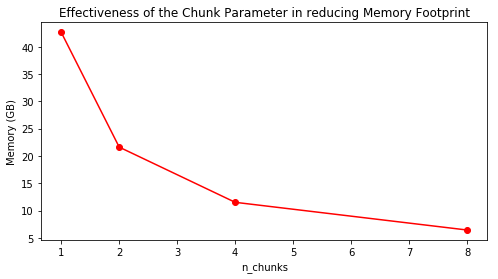

In [6]:
fig = plt.figure(figsize=(8,4)) 
times = np.array(mems)/1000
plt.plot([1,2,4,8],np.array(times),c='r',marker='o')
plt.xlabel('n_chunks')
plt.ylabel('Memory (GB)')
plt.title('Effectiveness of the Chunk Parameter in reducing Memory Footprint')

Text(0,0.5,'Time (minutes)')

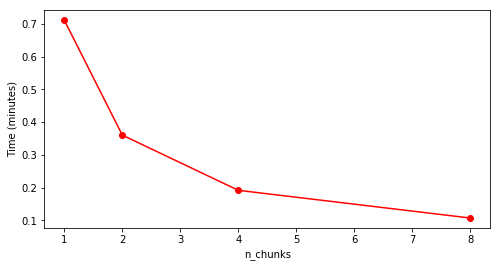

In [7]:
times = np.array(times)
fig = plt.figure(figsize=(8,4)) 
times = np.array(times)/60
plt.plot([1,2,4,8],np.array(times),c='r',marker='o')
plt.xlabel('n_chunks')
plt.ylabel('Time (minutes)')